# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/15/22
* Student Name: Nadir Siddiqui
* Student Net ID: nhs2bc
* This URL: https://github.com/nadirsiddiqui/Monte-Carlo-Simulator/blob/main/montecarlo_demo.ipynb
* GitHub Repo URL: https://github.com/nadirsiddiqui/Monte-Carlo-Simulator

# The Monte Carlo Module

In [1]:
import pandas as pd
import numpy as np


class Die():
    """
    This class initiates, modifies, and rolls "die".
    """
    
    def __init__(self, array):
        """
        This method initializes a dice object. It takes in an array of 
        values (either numeric or string) as the faces of the object.
        Each object's faces default to a weight of 1.0.
        """

        self.w = []
        for i in array:
            self.w.append(1.0)
        self._df = pd.DataFrame({
            'faces': array, 
            'weights': self.w
        })
    
    def change_weight(self, value, weight):
        """
        This method offers an opportunity to change the weights of the 
        faces of the object that was created.
        
        There are two parameters: 
            - value (the face value that is to be affected 
            - weight (the new weight to be assigned to the face)
            
        If the face value is not contained in the array of the object,
        an error message will be returned. 
        If the weight is not a float or is unable to be converted to 
        a float, an error message will be returned.
        """
        
        if value not in self._df.faces.values:
            print("Face value is not in the original array")
        elif (type(weight) != float) and (type(weight) != int):
            print("Weight is not valid")
        else:
            weight = float(weight)
            self._df.loc[self._df['faces'] == value, 'weights'] = weight
        
    def roll(self, number = 1):
        """
        This method rolls the object created by taking a random sample of the 
        object's faces using the assigned weights.
        
        There is one parameter:
            - number (number of rolls desired; The default is set to 1)
        """
        
        return list(self._df.sample(number, weights = self._df.weights, replace=True).faces)
        
    def show(self):
        """
        This method returns the current face values and the corresponding 
        weights for the object. 
        """
        
        return self._df

    
class Game():
    """
    This class initiates, plays, and displays the result of a game.
    """
    
    def __init__(self, die):
        """
        This method initializes a list of objects/die that will be used
        while playing the Game.
        
        There is 1 parameter:
            - die (A list of similar Die objects that will be in the game)
        """
        
        self.die = die
        
    def play(self, number):
        """
        This method plays the Game by rolling each object a set number of 
        times and adds the results of the rolls to a data frame. 
        
        There is 1 parameter:
            - number (The number of rolls each die should be rolled)
        """
        
        self._df = pd.DataFrame()
        self.x = 1
        for i in self.die:
            df1 = pd.DataFrame({"Die "+str(self.x): pd.Series(i.roll(number))})
            self._df = pd.concat([self._df, df1], axis = 1)
            self.x += 1

        self._df['Rolls'] = list(range(1, number+1))
        self._df.set_index('Rolls', inplace=True)
            
    def show(self, form = "wide"):
        """
        This method returns the data frame containing the results from
        playing the game. 
        
        There is 1 parameter:
            - form (Whether the data frame should be returned in wide or
            narrow form. If the input for this paramtere is not "narrow" or 
            "wide", it will return an error.
        """
  
        if form != "wide" and form != "narrow":
            print("Invalid form")
        elif form == "wide":
            return self._df
        elif form == "narrow":
            self._df = self._df.stack().to_frame('Face')
            self._df.reset_index().set_index(['Rolls','Face'])
            return self._df 
        

class Analyzer():
    """
    This class takes the results of a game and computes various descriptive
    statistical properties about it.
    """
    
    def __init__(self, game):
        """
        This method initializes the results of a game to prepare for analysis.
        
        There is 1 parameter:
            - game (a Game object to analyze)
        """
        
        self.game = game
        self._result = self.game.show()
            
    def jackpot(self):
        """
        This method compute how many times the game resulted in all faces 
        being identical. It then stores the roll number along with the face 
        value to a data frame called dfjack. Finally, it returns how many 
        jackpots occured to the user. 
        """
       
        vals = self._result.values
        self.dfjack = pd.DataFrame()
        self.jackpot = 0
        
        for i in range(0, len(self._result)-1):
            if pd.Series(vals[i]).nunique() == 1:
                df2 = pd.DataFrame({'Face' : pd.Series(vals[i][0]),
                                    'Roll' : i+1
                                   })
                self.dfjack = pd.concat([self.dfjack, df2], axis = 0)
                self.jackpot += 1
                
        self.dfjack.set_index('Roll', inplace=True)
        
        return self.jackpot   
            
    def combo(self):
        """
        This method computes and returns the distinct combinations of faces rolled, 
        along with their counts. This is returned as a data frame.
        """
        
        return self._result.apply(lambda x: pd.Series(sorted(x)), 1)\
    .value_counts()\
    .to_frame('n')
        
    def faces(self):
        """
        This method computes how many times a given face is rolled in each event and
        stores the results intoa data frame that is returned to the user. 
        """
        
        self.df = self._result.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        
        return self.df        

# Test Module

In [ ]:
import os
os.chdir('/Users/nadirsiddiqui/Documents/MSDS/DS5100/Monte-Carlo-Simulator/montecarlo')
from montecarlo.montecarlo import *
import unittest


class TestDieMethods(unittest.TestCase):
    """
    This class is designed to test the Die class.
    """
    
    def test_1_change_weight(self):
        """
        This test assures that the change weight method assigns weights correctly.
        """
        
        die1 = Die([1, 2, 3, 4, 5, 6])
        die1.change_weight(2, 5)
        actual = die1.show().weights[1] == 5.0
        expected = True
        
        self.assertEqual(actual, expected)
        
    def test_2_roll(self):
        """
        This test assures that the roll method rolls the dice the correct
        number of times.
        """
        
        die1 = Die([1, 2, 3, 4, 5, 6])
        actual = len(die1.roll(10))
        expected = 10

        self.assertEqual(actual, expected)
        
    def test_3_show(self):
        """
        This test assures that the show method properly stores and displays
        a data frame.
        """
        
        die1 = Die([1, 2, 3, 4, 5, 6])
        actual = len(die1.show())
        expected = 6
        
        self.assertEqual(actual, expected)
        
     
class TestGameMethods(unittest.TestCase):
    """
    This class is designed to test the Game class.
    """
    
    def test_1_play(self):
        """
        This test assures that the play method rolls all die the right
        number of times.
        """
        
        die1 = Die([1, 2, 3, 4, 5, 6])
        game1 = Game([die1])
        game1.play(100)
        actual = len(game1.show())
        expected = 100
        
        self.assertEqual(actual, expected)
        
            
    def test_2_show(self):
        """
        This test assures that the show method properly stores and displays
        a data frame.
        """
        
        die1 = Die([1, 2, 3, 4, 5, 6])
        game1 = Game([die1])
        game1.play(100)
        actual = len(game1.show())
        expected = 100
        
        self.assertEqual(actual, expected)

        
class TestAnalyzerMethods(unittest.TestCase):
    """
    This class is designed to test the Analyzer class.
    """
    
    def test_1_jackpot(self):
        """
        This test assures that the jackpot method stores only rolls that
        resulted in a proper jackpot.
        """
        
        die1 = Die([1, 1, 1])
        die2 = Die([1, 1, 1])
        game1 = Game([die1, die2])
        game1.play(100)
        analysis = Analyzer(game1)
        actual = analysis.jackpot()
        expected = 99
        
        self.assertEqual(actual, expected)
    
    def test_2_combo(self):
        """
        This test assures that the combo method properly stores and displays
        a data frame of combos.
        """
        
        die1 = Die([1, 2, 3, 4, 5, 6])
        die2 = Die([1, 2, 3, 4, 5, 6])
        game1 = Game([die1, die2])
        game1.play(100)
        analysis = Analyzer(game1)
        actual = sum(analysis.combo().n)
        expected = 100
        
        self.assertEqual(actual, expected)
    
    def test_3_faces(self):
        """
        This test assures that the faces method properly stores and displays
        a data frame of face counts per roll.
        """
        
        die1 = Die([1, 2, 3, 4, 5, 6])
        die2 = Die([1, 2, 3, 4, 5, 6])
        game1 = Game([die1, die2])
        game1.play(100)
        analysis = Analyzer(game1)
        actual = [len(analysis.faces().columns), len(analysis.faces())]
        expected = [6, 100]
        
        self.assertEqual(actual, expected)
    
if __name__ == '__main__':
    unittest.main(verbosity=3)

# Test Results

In [ ]:
test_1_jackpot (__main__.TestAnalyzerMethods)
This test assures that the jackpot method stores only rolls that ... ok
test_2_combo (__main__.TestAnalyzerMethods)
This test assures that the combo method properly stores and displays ... ok
test_3_faces (__main__.TestAnalyzerMethods)
This test assures that the faces method properly stores and displays ... ok
test_1_change_weight (__main__.TestDieMethods)
This test assures that the change weight method assigns weights correctly. ... ok
test_2_roll (__main__.TestDieMethods)
This test assures that the roll method rolls the dice the correct ... ok
test_3_show (__main__.TestDieMethods)
This test assures that the show method properly stores and displays ... ok
test_1_play (__main__.TestGameMethods)
This test assures that the play method rolls all die the right ... ok
test_2_show (__main__.TestGameMethods)
This test assures that the show method properly stores and displays ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.087s

OK


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [2]:
from montecarlo.montecarlo import *
import numpy as np
import matplotlib.pyplot as plt

Welcome to the Monte Carlo Simulator!


In [4]:
fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)

rolls = 1000
game1 = Game([fair_coin, fair_coin, fair_coin])
game1.play(rolls)
game2 = Game([unfair_coin, unfair_coin, fair_coin])
game2.play(rolls)

In [5]:
analysis1 = Analyzer(game1)
a1 = analysis1.jackpot()/rolls
analysis2 = Analyzer(game2)
a2 = analysis2.jackpot()/rolls
print("Game 1 Jackpot Frequency: ", a1)
print("Game 2 Jackpot Frequency: ", a2)

Game 1 Jackpot Frequency:  0.268
Game 2 Jackpot Frequency:  0.361


<BarContainer object of 2 artists>

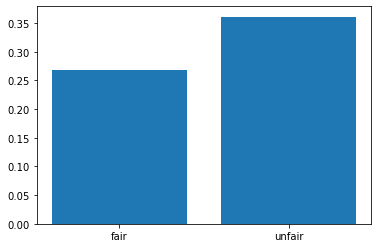

In [6]:
plt.bar(['fair','unfair'],[a1, a2])

## Scenario 2

In [7]:
dice = np.array(range(1,7))
fair = Die(dice)
unfair1 = Die(dice)
unfair2 = Die(dice)
unfair1.change_weight(6, 5)
unfair2.change_weight(1, 5)

rolls = 10000
game1 = Game([fair, fair, fair, fair, fair])
game1.play(rolls)
game2 = Game([unfair1, unfair1, unfair2, fair, fair])
game2.play(rolls)

In [8]:
analysis1 = Analyzer(game1)
a1 = analysis1.jackpot()/rolls
analysis2 = Analyzer(game2)
a2 = analysis2.jackpot()/rolls
print("Game 1 Jackpot Frequency: ", a1)
print("Game 2 Jackpot Frequency: ", a2)

Game 1 Jackpot Frequency:  0.0004
Game 2 Jackpot Frequency:  0.0009


<BarContainer object of 2 artists>

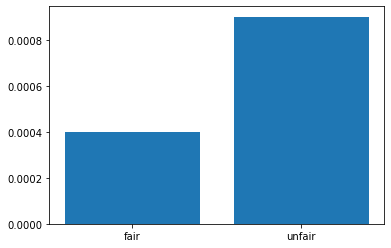

In [9]:
plt.bar(['fair','unfair'],[a1, a2])

<AxesSubplot:title={'center':'Game 1: Most Frequent Combinations'}, xlabel='Combinations of Faces', ylabel='Count'>

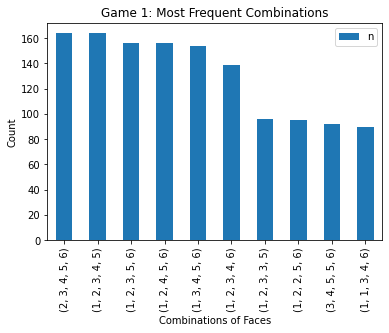

In [10]:
analysis1.combo().head(10).plot(kind = 'bar', title = 'Game 1: Most Frequent Combinations', xlabel = 'Combinations of Faces', ylabel = 'Count')

<AxesSubplot:title={'center':'Game 2: Most Frequent Combinations'}, xlabel='Combinations of Faces', ylabel='Count'>

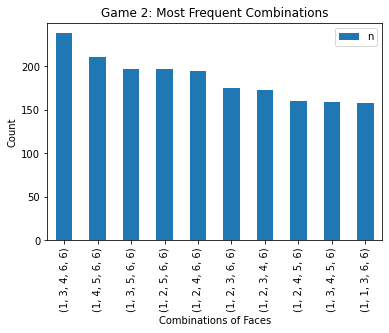

In [11]:
analysis2.combo().head(10).plot(kind = 'bar', title = 'Game 2: Most Frequent Combinations', xlabel = 'Combinations of Faces', ylabel = 'Count')

## Scenario 3

In [12]:
letters = ["a","b","c","d","e",
           "f","g","h","i","j",
           "k","l","m","n","o",
           "p","q","r","s","t",
           "u","v","w","x","y","z"]
l_die = Die(letters)
l_die.show()
weights = [8.4966, 2.0720, 4.5388, 3.3844,
           11.1607, 1.8121, 2.4705, 3.0034,
           7.5448, 0.1965, 1.1016, 5.4893, 
           3.0129, 6.6544, 7.1635, 3.1671, 
           0.1962, 7.5809, 5.7351, 6.9509, 
           3.6308, 1.0074, 1.2899, 0.2902, 
           1.7779, 0.2722]

x = 0
for i in letters:
    l_die.change_weight(i, weights[x])
    x += 1
                   
game = Game([l_die, l_die, l_die, l_die, l_die])
game.play(1000)
analysis = Analyzer(game)
pd.set_option('display.multi_sparse', False)
#analysis.combo().index.values
words = 5
word_freq = words/1000
print('Combos that look like English words: ', words)
print('Relative frequency of words: ', word_freq)

Combos that look like English words:  5
Relative frequency of words:  0.005


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [13]:
!ls -lRF -o

total 88
-rw-r--r--@ 1 501   1070 Jul 15 15:54 LICENSE
-rw-r--r--  1 501     23 Jul 15 15:54 README.md
drwxr-xr-x@ 3 501     96 Jul 15 18:28 __pycache__/
drwxr-xr-x@ 6 501    192 Jul 15 19:17 montecarlo/
drwxr-xr-x@ 6 501    192 Jul 15 19:06 montecarlo.egg-info/
-rw-r--r--@ 1 501  22290 Jul 15 19:21 montecarlo_demo.ipynb
-rw-r--r--@ 1 501   1032 Jul 15 18:29 montecarlo_testresults.txt
-rw-r--r--@ 1 501   3594 Jul 15 19:12 montecarlo_tests.py
-rw-r--r--  1 501    311 Jul 15 19:01 setup.py

./__pycache__:
total 16
-rw-r--r--  1 501  6490 Jul 15 18:28 montecarlo.cpython-39.pyc

./montecarlo:
total 24
-rw-r--r--  1 501    46 Jul 15 18:58 __init__.py
drwxr-xr-x@ 4 501   128 Jul 15 19:17 __pycache__/
-rw-r--r--@ 1 501  5959 Jul 15 18:19 montecarlo.py

./montecarlo/__pycache__:
total 24
-rw-r--r--  1 501   229 Jul 15 19:03 __init__.cpython-39.pyc
-rw-r--r--  1 501  6501 Jul 15 19:17 montecarlo.cpython-39.pyc

./montecarlo.egg-info:
total 32
-rw-r--r--  1 501  241 Jul 15 19:06 PKG-INFO
-rw-r--

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [14]:
# Installation commands
!pip install -e .

Obtaining file:///Users/nadirsiddiqui/Documents/MSDS/DS5100/Monte-Carlo-Simulator
  Preparing metadata (setup.py) ... done
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 0.1
    Uninstalling montecarlo-0.1:
      Successfully uninstalled montecarlo-0.1
  Running setup.py develop for montecarlo
